## Fundamentals of Data Analytics Repeat Project 2019 based on Diamond dataset
### Name: Mary McHale.
### Student ID: G00253431

## Introduction

Definition of a diamond, from the British dictionary: a colourless exceptionally hard mineral (but often tinted yellow, orange, blue, brown, or black by impurities), found in certain igneous rocks (especially the Kimberlites of South Africa). It is used as a gemstone, as an abrasive, and on the working edges of cutting tools. [1]

Diamonds are valued based on the 4'C's - Cut, colour, clarity and carat. I will analyse how each of these variables affects the price of the diamond.

## Background of Diamond dataset:

Unlike the previous project pertaining to the IRIS dataset which was introduced by Ronald Fischer, a british statistician in 1936, no one person is claiming the Diamond dataset based on my research. It is a more recent dataset.

The diamonds data set comes with the ggplot2 package and lists the prices and the specifications for more than 50,000 diamonds collected in 2008 from diamondsc.info. What makes diamonds unique and the analyzing of this data set useful because diamonds are unique in the way that isn’t true of most manufactured products that we are used to buying. You can’t just put in a model number and look up the price.

(picture)

## Importing the required libraries via the Pandas package which contains functions to assist in analysing data. 

Pandas is intended for "real world data analysis in Python." It is an open source data analysis/manipulation toolavailable in all languages.[2]

In [1]:
# Importing the Libraries
import pandas as pd
import io
import requests
import numpy as np

In [2]:
#Reading the dataset form the URL provided in Project instructions
# Reference [3]
url="https://raw.githubusercontent.com/ianmcloughlin/datasets/master/diamonds.csv"
get_content=requests.get(url).content
diamonds=pd.read_csv(io.StringIO(get_content.decode('utf-8')))

In [3]:
#Viewing the dataset
print("Dataset at a glance, viewing top 10 rows")
diamonds.head(10)

Dataset at a glance, viewing top 10 rows


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [4]:
#printing number of rows and columns in the dataset
print("Total number of Rows:",diamonds.shape[0])
print("Total number of Columns:",diamonds.shape[1])


Total number of Rows: 53940
Total number of Columns: 10


# Description of the variables(columns) in the dataset Data set. [4]

It is a data frame with 53,940 rows and 10 variables. A description of the variables follows:

* Price - price in US dollars

* Carat - weight of the diamond

* Cut - quality of the cut (Fair, Good, Very Good, Premium, Ideal)

* Colour - diamond colour ranging from D (best) to J (worst)

* Clarity - a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

* Depth - total depth percentage = z / mean(x, y) = 2 * z / (x + y)
    * x - length in mm.

    * y - width in mm.

    * z - depth in mm.
    
* Table - width of top of diamond in relation to it's widest point.


## Description of describe() output. [5]

* For numeric variables - carat, depth, table, x, y and z the describe() function shows - 
    * Count
    * Standard Deviation
    * Minimum 
    * 1st Quartile
    * Median 
    * Mean 
    * 3rd Quartile
    * Maximum value. 

 

In [5]:
# Describing the Numerical Variables
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
# Describing the categorical variables

print("Types of Cut:",diamonds['cut'].unique())
print("Count of each type:",diamonds.groupby(['cut']).count().iloc[:,0])
print("\n")

print("Types of Color:",diamonds['color'].unique())
print("Count of each type:",diamonds.groupby(['color']).count().iloc[:,0])
print("\n")

print("Types of Color:",diamonds['color'].unique())
print("Count of each type:",diamonds.groupby(['clarity']).count().iloc[:,0])
print("\n")


Types of Cut: ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Count of each type: cut
Fair          1610
Good          4906
Ideal        21551
Premium      13791
Very Good    12082
Name: carat, dtype: int64


Types of Color: ['E' 'I' 'J' 'H' 'F' 'G' 'D']
Count of each type: color
D     6775
E     9797
F     9542
G    11292
H     8304
I     5422
J     2808
Name: carat, dtype: int64


Types of Color: ['E' 'I' 'J' 'H' 'F' 'G' 'D']
Count of each type: clarity
I1        741
IF       1790
SI1     13065
SI2      9194
VS1      8171
VS2     12258
VVS1     3655
VVS2     5066
Name: carat, dtype: int64




## Visualising the data ¶

Plotting histogram to visualize the numerical distribution of the data.


## Objective: To find out which attribute has the higher impact on price

Trying to plot different attribute vs price to check their relationship below. For better visualisation I am remapping the categorical variables to numbers as shown below

### Analysis depending on the Categorical variables

In [7]:
cut = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}
clarity = {"I1": 1, "I2": 2, "I3": 3, "SI2": 4, "SI1": 5, "VS2": 6, "VS1": 7, "VVS2": 8, "VVS1": 9, "IF": 10, "FL": 11}
color = {"J": 1,"I": 2,"H": 3,"G": 4,"F": 5,"E": 6,"D": 7}

diamonds['cut'] = diamonds['cut'].map(cut)
diamonds['clarity'] = diamonds['clarity'].map(clarity)
diamonds['color'] = diamonds['color'].map(color)

In [8]:
diamonds[['color','cut','clarity','price']].head()

,color,cut,clarity,price
0,6,5,4,326
1,6,4,5,326
2,6,2,7,327
3,2,4,6,334
4,1,2,4,335


#### Price vs Cut

In [9]:
#importing Libraries
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plot
import seaborn as s
from matplotlib.pyplot import hist

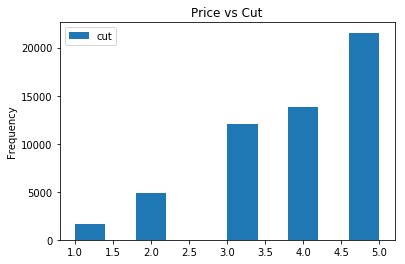

In [10]:
diamonds.plot( x='price', y='cut', kind='hist', title='Price vs Cut')
plot.show()

In [11]:
print(cut)

{'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}


#### Observation on cut

More diamonds with Ideal cut. The highest price is of a diamond with cut-5 ideal. The relationship between cut and price is steady. 

#### Price vs color

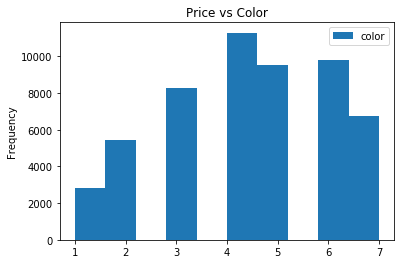

In [12]:
diamonds.plot( x='price', y='color', kind='hist', title='Price vs Color')
plot.show()

In [ ]:
print(color)

{'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}


#### Observation on color 

Diamonds with color H has a lower price than others.

#### Price vs Clarity

In [ ]:
diamonds.plot( x='price', y='clarity', kind='hist', title='Price vs Clarity')
plot.show()

In [ ]:
print(clarity)

#### Observation on Clarity 

Diamonds with clarity I1-I3 has lower price and with clarity SI2 and rest have a greater price

### Analysis depending on the Numerical variables

#### Price vs Depth

In [ ]:
diamonds.plot( x='price', y='depth', kind='hist', title='Price vs Depth')
plot.show()

#### Price vs Table

In [ ]:
diamonds.plot( x='price', y='table', kind='hist', title='Price vs Depth')
plot.show()

#### Observation for 'price vs cut' and 'price vs table'
In both cases,
we can see normal distribution. The data is gathered around the mean. It can be said that more diamonds with depth with the range of 57-67 have a greater price. 
The potential reason can be :
- mean, standard deviation and minimum is very similar for variables x, y, z.
- minimum is the same for both depth and table varuiables at 43.0

In [ ]:
print("Minimum for x,y,z: ",diamonds.x.min(),"|",diamonds.y.min(),"|",diamonds.z.min())
print("Mean x,y,z: ",diamonds.x.mean(),"|",diamonds.y.mean(),"|",diamonds.z.mean())
print("Standard deviation x,y,z: ",diamonds.x.std(),"|",diamonds.y.std(),"|",diamonds.z.std())


#### Price vs Carat

In [ ]:
# Plotting Price vs Carat
plot.figure(figsize=(10,10))
plot.scatter(diamonds['carat'], diamonds['price'],color='r', alpha=0.5, label="Carat vs Price")
plot.xlabel("Carat")
plot.ylabel("Price")
plot.legend(loc='upper left')
plot.show()

#### Observation

From the scatter plot it can be noticed that Price and Carat follow a direct proportion.

# References

[1] https://www.dictionary.com/browse/diamond

[2] https://pandas.pydata.org/

[3] https://stackoverflow.com/questions/32400867/pandas-read-csv-from-url

[4] https://ggplot2.tidyverse.org/reference/diamonds.html

[5] https://mathalope.co.uk/2015/03/12/show-me-a-quick-summary-of-the-diamonds-dataset/

